# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Observable trends:
1. There is strong relationship between latitude vs. temperature, r-value for latitude in Northern Hemisphere vs. temperature is less than -0.7, r-value for latitude in Southern Hemisphere vs. temperature is more than 0.7. The weather is warmer when the latitude is closer to 0.
2. There is no relationship between latitude vs. humidity, r-values are close to 0.
3. There is no relationship between latitude vs. cloudiness, r-values are close to 0. 
4. There is no relationship between latitude vs. wind speed, r-values are close to 0.
5. The above observations are based on weather data downloaded on 17 June 2022.

In [1]:
# Dependencies
import random
import json
import os
import csv
import requests
from api_keys import weather_api_key
from pprint import pprint
from citipy import citipy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress


## Generate Cities List

In [2]:
count = 0
cities_list = []
while count < 2000:
    lat = np.random.uniform(-90, 90)
    lng = np.random.uniform(-180, 180)
    city = citipy.nearest_city(lat, lng)
    name_city = city.city_name
    if name_city not in cities_list:
        cities_list.append(name_city)
        if len(cities_list) >642:
            break
    count += 1

len(cities_list)

643

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"

unit = "imperial"
query_url = url + "appid=" + weather_api_key + "&units=" + unit + "&q="

cities_set = [cities_list[x:x+50] for x in range(0, len(cities_list), 50)]

city = []
lat = []
lon = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
remove_city = []

print("Beginning Data Retrieval")
print("-----------------------------")
for i in range(len(cities_set)):
    for j in range(len(cities_set[i])):
        try:
            print(f"Processing Record {j+1} of set {i+1} | {cities_set[i][j]}")
            response = requests.get(query_url+cities_set[i][j])
            weather_json = response.json()
            city.append(weather_json["name"])
            lat.append(weather_json["coord"]["lat"])
            lon.append(weather_json["coord"]["lon"])
            temp.append(weather_json["main"]["temp_max"])
            humidity.append(weather_json["main"]["humidity"])
            cloudiness.append(weather_json["clouds"]["all"])
            wind_speed.append(weather_json["wind"]["speed"])
            country.append(weather_json["sys"]["country"])
            date.append(weather_json["dt"])
        except:
            print(f"City not found. Skipping...")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of set 1 | barrow
Processing Record 2 of set 1 | gat
Processing Record 3 of set 1 | hobart
Processing Record 4 of set 1 | cheuskiny
City not found. Skipping...
Processing Record 5 of set 1 | kumba
Processing Record 6 of set 1 | bredasdorp
Processing Record 7 of set 1 | karuzi
Processing Record 8 of set 1 | esna
Processing Record 9 of set 1 | mansa
Processing Record 10 of set 1 | vila velha
Processing Record 11 of set 1 | puerto ayora
Processing Record 12 of set 1 | nadvoitsy
Processing Record 13 of set 1 | hasaki
Processing Record 14 of set 1 | atuona
Processing Record 15 of set 1 | bowen
Processing Record 16 of set 1 | yellowknife
Processing Record 17 of set 1 | busselton
Processing Record 18 of set 1 | cayenne
Processing Record 19 of set 1 | falmouth
Processing Record 20 of set 1 | cairns
Processing Record 21 of set 1 | caravelas
Processing Record 22 of set 1 | shingu
Processing Record 23 of set 1 | kargil
Pro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
weather_dict = {
    "City": city,
    "Lat": lat,
    "Lon": lon,
    "Max Temp (f)": temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date}
weather_data = pd.DataFrame(weather_dict)

output_path = os.path.join("weather_data.csv")

weather_data.to_csv (output_path, index = False, header=True)

weather_data.head()


,City,Lat,Lon,Max Temp (f),Humidity,Cloudiness,Wind Speed,Country,Date
0,Barrow,71.2906,-156.7887,46.42,76,75,12.66,US,1655440622
1,Kiryat Gat,31.6100,34.7642,77.81,100,0,7.92,IL,1655440848
2,Hobart,-42.8794,147.3294,52.27,87,99,1.99,AU,1655440642
3,Kumba,4.6363,9.4469,70.34,99,100,1.39,CM,1655440851
4,Bredasdorp,-34.5322,20.0403,50.23,45,64,6.08,ZA,1655440851


In [8]:
new_weather_data = weather_data[["Lat","Lon","Max Temp (f)","Humidity","Cloudiness","Wind Speed","Date"]].copy()
count = new_weather_data.count()
mean = new_weather_data.mean()
std = new_weather_data.std()
min = new_weather_data.min()
q25 = new_weather_data.quantile(.25)
q50 = new_weather_data.quantile(.5)
q75 = new_weather_data.quantile(.75)
max = new_weather_data.max()

stat_df = pd.DataFrame({"count": count,"mean": mean, "std": std, "min": min, "25%": q25, "50%": q50, "70%": q75, "max": max})

stat_df_transpose = stat_df.T
stat_df_transpose

,Lat,Lon,Max Temp (f),Humidity,Cloudiness,Wind Speed,Date
count,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,5.950000e+02
mean,22.411176,24.512155,68.655261,68.897479,54.791597,8.043597,1.655441e+09
std,32.560927,90.870302,14.843682,21.642440,38.614519,5.359559,1.888911e+02
min,-54.800000,-175.200000,28.330000,1.000000,0.000000,0.000000,1.655440e+09
25%,-2.380250,-54.535800,58.340000,58.000000,14.500000,3.990000,1.655441e+09
50%,27.804300,29.086400,70.920000,74.000000,63.000000,6.910000,1.655441e+09
70%,49.766800,109.425000,80.115000,85.000000,95.000000,11.400000,1.655441e+09
max,78.218600,179.316700,102.970000,100.000000,100.000000,29.930000,1.655441e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
weather_data.loc[(weather_data["Humidity"]>100),:]

,City,Lat,Lon,Max Temp (f),Humidity,Cloudiness,Wind Speed,Country,Date


In [10]:
#  Get the indices of cities that have humidity over 100%.
indices = weather_data.loc[(weather_data["Humidity"]>100),:].index
indices

Int64Index([], dtype='int64')

In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_data.drop(index=indices, inplace=False)
clean_city_data.head()

,City,Lat,Lon,Max Temp (f),Humidity,Cloudiness,Wind Speed,Country,Date
0,Barrow,71.2906,-156.7887,46.42,76,75,12.66,US,1655440622
1,Kiryat Gat,31.6100,34.7642,77.81,100,0,7.92,IL,1655440848
2,Hobart,-42.8794,147.3294,52.27,87,99,1.99,AU,1655440642
3,Kumba,4.6363,9.4469,70.34,99,100,1.39,CM,1655440851
4,Bredasdorp,-34.5322,20.0403,50.23,45,64,6.08,ZA,1655440851


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

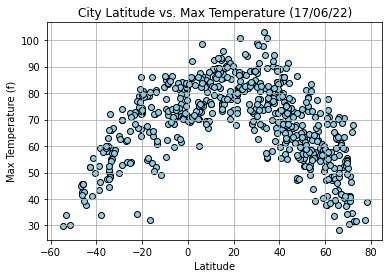

In [21]:
x_lat = clean_city_data["Lat"]
y_temp = clean_city_data["Max Temp (f)"]
plt.scatter (x_lat,y_temp, marker="o", facecolors="skyblue", edgecolors="black", alpha=1)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (f)")
plt.title("City Latitude vs. Max Temperature (17/06/22)")
plt.grid()
plt.savefig("Fig1.png") 
plt.show()

The code above creates scatter plot to show relationships between Latitude and Max Temperature. Data downloaded on 17 June 2022

## Latitude vs. Humidity Plot

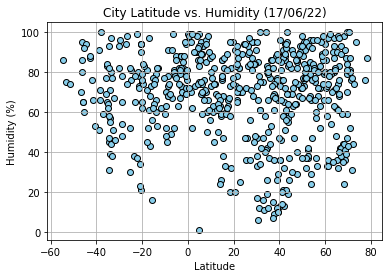

In [22]:
x_lat = clean_city_data["Lat"]
y_hum = clean_city_data["Humidity"]
plt.scatter (x_lat,y_hum, marker="o", facecolors="skyblue", edgecolors="black", alpha=1)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (17/06/22)")
plt.grid()
plt.savefig("Fig2.png") 
plt.show()

The code above creates scatter plot to show relationships between Latitude and Humidity. Data downloaded on 17 June 2022.

## Latitude vs. Cloudiness Plot

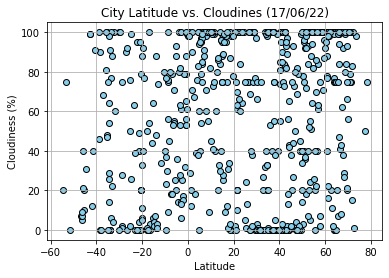

In [23]:
x_lat = clean_city_data["Lat"]
y_cloud = clean_city_data["Cloudiness"]
plt.scatter (x_lat,y_cloud, marker="o", facecolors="skyblue", edgecolors="black", alpha=1)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudines (17/06/22)")
plt.grid()
plt.savefig("Fig3.png") 
plt.show()

The code above creates scatter plot to show relationships between Latitude and Cloudiness. Data downloaded on 17 June 2022.

## Latitude vs. Wind Speed Plot

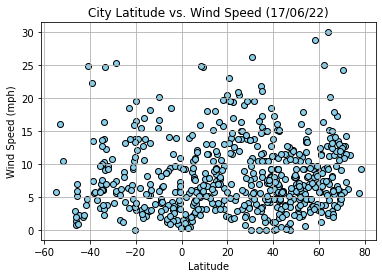

In [24]:
x_lat = clean_city_data["Lat"]
y_wind = clean_city_data["Wind Speed"]
plt.scatter (x_lat,y_wind, marker="o", facecolors="skyblue", edgecolors="black", alpha=1)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (17/06/22)")
plt.grid()
plt.savefig("Fig4.png") 
plt.show()

The code above creates scatter plot to show relationships between Latitude and Wind Speed. Data downloaded on 17 June 2022.

## Linear Regression

In [26]:
# split data between northern hemisphere vs. southern hemisphere
north_hemisphere_data = clean_city_data.loc[(clean_city_data["Lat"]>=0),:].copy()
south_hemisphere_data = clean_city_data.loc[(clean_city_data["Lat"]<0),:].copy()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.7084669107758702


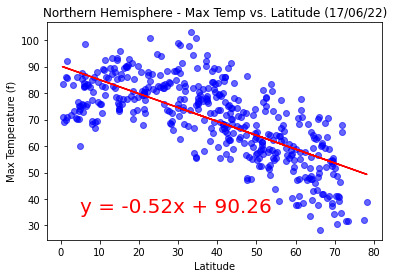

In [39]:
x_n_lat = north_hemisphere_data["Lat"]
y_n_temp = north_hemisphere_data["Max Temp (f)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_n_lat, y_n_temp)
regress_values = x_n_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter (x_n_lat,y_n_temp, marker="o", facecolors="blue", alpha=0.6)
plt.plot(x_n_lat,regress_values,"r-")
plt.annotate(line_eq, (5,35),fontsize=20,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (f)")
plt.title("Northern Hemisphere - Max Temp vs. Latitude (17/06/22)")
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7260847749308632


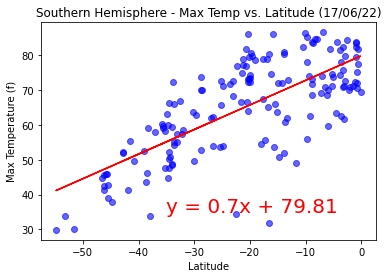

In [45]:
x_s_lat = south_hemisphere_data["Lat"]
y_s_temp = south_hemisphere_data["Max Temp (f)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_s_lat, y_s_temp)
regress_values = x_s_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter (x_s_lat,y_s_temp, marker="o", facecolors="blue", alpha=0.6)
plt.plot(x_s_lat,regress_values,"r-")
plt.annotate(line_eq, (-35,35),fontsize=20,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (f)")
plt.title("Southern Hemisphere - Max Temp vs. Latitude (17/06/22)")
print(f"The r-value is: {rvalue}")
plt.show()

There is strong relationship between latitude vs. temperature, r-value for latitude in Northern Hemisphere vs. temperature is less than -0.7, r-value for latitude in Southern Hemisphere vs. temperature is more than 0.7. The weather is warmer when the latitude is closer to 0.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.04431178398264235


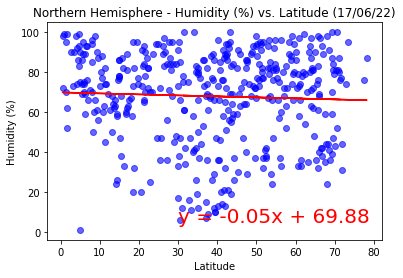

In [47]:
x_n_lat = north_hemisphere_data["Lat"]
y_n_humidity = north_hemisphere_data["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_n_lat, y_n_humidity)
regress_values = x_n_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter (x_n_lat,y_n_humidity, marker="o", facecolors="blue", alpha=0.6)
plt.plot(x_n_lat,regress_values,"r-")
plt.annotate(line_eq, (30,5),fontsize=20,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude (17/06/22)")
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.10217383529830368


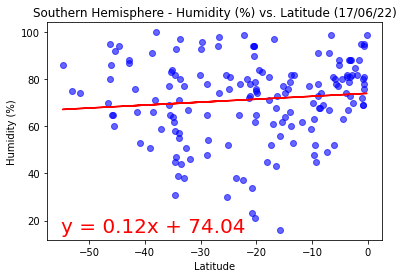

In [48]:
x_s_lat = south_hemisphere_data["Lat"]
y_s_humidity = south_hemisphere_data["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_s_lat, y_s_humidity)
regress_values = x_s_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter (x_s_lat,y_s_humidity, marker="o", facecolors="blue", alpha=0.6)
plt.plot(x_s_lat,regress_values,"r-")
plt.annotate(line_eq, (-55,15),fontsize=20,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude (17/06/22)")
print(f"The r-value is: {rvalue}")
plt.show()

There is no relationship between latitude vs. humidity, r-values are close to 0.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0014673896336491786


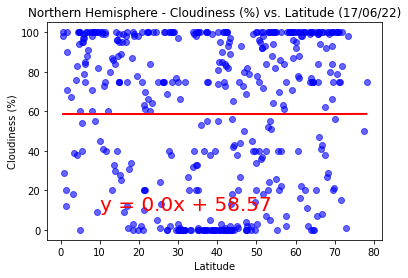

In [50]:
x_n_lat = north_hemisphere_data["Lat"]
y_n_cloud = north_hemisphere_data["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_n_lat, y_n_cloud)
regress_values = x_n_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter (x_n_lat,y_n_cloud, marker="o", facecolors="blue", alpha=0.6)
plt.plot(x_n_lat,regress_values,"r-")
plt.annotate(line_eq, (10,10),fontsize=20,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude (17/06/22)")
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.10262321077509694


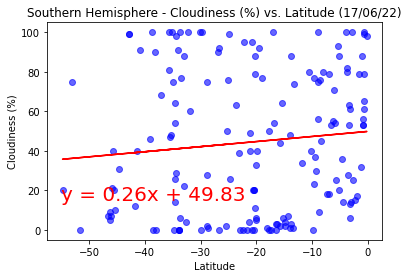

In [51]:
x_s_lat = south_hemisphere_data["Lat"]
y_s_cloud = south_hemisphere_data["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_s_lat, y_s_cloud)
regress_values = x_s_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter (x_s_lat,y_s_cloud, marker="o", facecolors="blue", alpha=0.6)
plt.plot(x_s_lat,regress_values,"r-")
plt.annotate(line_eq, (-55,15),fontsize=20,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude (17/06/22)")
print(f"The r-value is: {rvalue}")
plt.show()

There is no relationship between latitude vs. cloudiness, r-values are close to 0. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0324927828078984


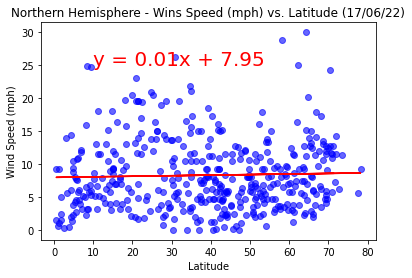

In [52]:
x_n_lat = north_hemisphere_data["Lat"]
y_n_wind = north_hemisphere_data["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_n_lat, y_n_wind)
regress_values = x_n_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter (x_n_lat,y_n_wind, marker="o", facecolors="blue", alpha=0.6)
plt.plot(x_n_lat,regress_values,"r-")
plt.annotate(line_eq, (10,25),fontsize=20,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Wins Speed (mph) vs. Latitude (17/06/22)")
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.10956085351861171


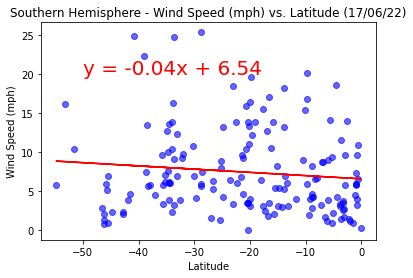

In [55]:
x_s_lat = south_hemisphere_data["Lat"]
y_s_wind = south_hemisphere_data["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_s_lat, y_s_wind)
regress_values = x_s_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter (x_s_lat,y_s_wind, marker="o", facecolors="blue", alpha=0.6)
plt.plot(x_s_lat,regress_values,"r-")
plt.annotate(line_eq, (-50,20),fontsize=20,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude (17/06/22)")
print(f"The r-value is: {rvalue}")
plt.show()

There is no relationship between latitude vs. wind speed, r-values are close to 0.